# Chapter 3: Linear Methods for Regression

We have an input vector $X^T = (X_1, X_2, ..., X_p)$ and want to predict a real-valued ouput $Y$.  The linear regression model has the form

$$ f(X) = \beta_0 + \sum_{j=1}^p \, X_j \, \beta_j         
\tag{3.1}$$

where the $\beta_j$ are unknown parameters.  Note that if we add an element $X_0=1$ to $X^T = (1, X_1, X_2, ..., X_p)$ and absorb the *intercept* parameter $\beta_0$ into the summation, we can write the regression model as a simple inner product

$$ f(X) = \sum_{j=0}^p \, X_j \, \beta_j    
\tag{3.1a} $$

Typically we have a set of training data $(x_1, y_1) ... (x_N, y_N)$ from which to estimate these parameters.  Each $x_i = (1, x_{i1}, x_{i2}, ...., x_{ip})^T$ is a vector of feature measurements for the $i$th case.  The most popular estimation method is *least squares*, in which we pick parameters $\beta = (\beta_0, \beta_1, ..., \beta_p)^T$ to minimize the residual sum of squares

$$ 
\begin{aligned}
{\rm RSS}(\beta) &= \sum_{i=1}^{N} \left[y_i - f(x_i)\right]^2 \\
&= \sum_{i=1}^{N} \left[ y_i - \sum_{j=0}^p \, x_{ij} \, \beta_j \right]^2
\end{aligned}
\tag{3.2}
$$

If we construct an $N \times (p+1)$ matrix from the vectors $x_i$ (sometimes called the design matrix) we can express $RSS(\beta)$ using only matrix operations

$$
{\bf X} = 
\begin{bmatrix}
    1       & x_{11} & x_{12} & \dots & x_{1p} \\
    1       & x_{21} & x_{22} & \dots & x_{2p} \\
    \vdots  & \vdots & \vdots & \ddots & \vdots \\
    1       & x_{N1} & x_{N2} & \dots & x_{Np}
\end{bmatrix}
\quad
{\bf y} = 
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{N}
\end{bmatrix}
\quad
\beta = 
\begin{bmatrix}
    \beta_{0} \\
    \beta_{1} \\
    \beta_{2} \\
    \vdots \\
    \beta_{p}
\end{bmatrix}
$$

$$ {\rm RSS}(\beta) = ({\bf y} - {\bf X} \beta)^T ({\bf y} - {\bf X} \beta) 
\tag{3.3}$$

This is a quadratic function in the $p+1$ parameters $\beta$. Differentiating with respect to $\beta$ we obtain

$$
\begin{aligned}
\frac{\partial {\rm RSS}}{\partial \beta} &= -2 {\bf X}^T ({\bf y} - {\bf X} \beta) \\
\frac{\partial^2 {\rm RSS}}{\partial \beta \, \partial \beta^T} &= 2 {\bf X}^T {\bf X}
\end{aligned}
\tag{3.4}
$$

Assuming (for the moment) that ${\bf X}$ has full column rank (i.e. the columns=features are linearly independent), and hence ${\bf X}^T {\bf X}$ is positive definite, we set the first derivative to zero

$$ {\bf X}^T ({\bf y} - {\bf X} \beta) = 0 
\tag{3.5}$$

to obtain the unique solution

$$ 
\hat{\beta} = ({\bf X}^T {\bf X})^{-1} {\bf X}^T {\bf y} 
\tag{3.6}$$

The fitted values at the training inputs are 
$$\hat{\bf y} = {\bf X} \hat{\beta} = {\bf X}({\bf X}^T {\bf X})^{-1} {\bf X}^T {\bf y} 
\tag{3.7}
$$

Up to now we have made minimal assumptions about the true distribution of the data.  In order to pin down the sampling properties of $\hat{\beta}$, we now assume that the observations $y_i$ are uncorrelated and have constant variance $\sigma^2$, and that the $x_i$ are fixed (non random).  The covariance matrix of the least squares parameter estimates is easily derived from (3.6) and is given by

$$ {\rm Var}(\hat{\beta}) = ({\bf X}^T {\bf X})^{-1} \sigma^2 
\tag{3.8}$$

Typically one estimates the variance $\sigma^2$ by 

$$ \hat{\sigma}^2 = 
\frac{\sum_{i=1}^{N}\left( y_i - \hat{y}_i \right)^2} {N - p - 1} = 
\frac{({\bf y} - {\bf \hat{y}})^T ({\bf y} - {\bf \hat{y}})} {N - p - 1}
$$

The $N - p - 1$ rather than $N$ in the denominator makes $\hat{\sigma}^2$ an unbiased estimate of $\sigma^2: {\rm E}(\hat{\sigma}^2) = \sigma^2$.  

To test the hypothesis that a particular parameter $\beta_j=0$, we form the standardized parameter or *Z-score*

$$
z_j = \frac{\hat{\beta}_j}{\hat{\sigma} \sqrt{v_j}} = 
\frac{\hat{\beta}_j}{\sqrt{diag \left( {\rm Var}(\hat{\beta}) \right)_j}} 
\tag{3.12}
$$

where $v_j$ is the $j$th diagonal element of $({\bf X}^T {\bf X})^{-1}$.

# Prostate Data Example

Lets explore the prostate data set provided at the book website https://statweb.stanford.edu/~tibs/ElemStatLearn/data.html

In [1]:
import pandas
import numpy as np
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pandas.read_csv('../data/prostate.data', delimiter='\t', index_col=0)

In [3]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


We have a target variable (`lpsa`), a boolean column splitting the data into train and test sets (`train`), and 8 predictor variables (all the rest).  Lets look at the training data and calculate some of its properties.  

In [4]:
# pull out training set and split into predictor variables and the target variable
predictors = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
df_X = df.loc[df['train']=='T', predictors]
# center on the means and scale to have unit standard deviation
df_X = (df_X - df_X.mean()) / df_X.std()


target = ['lpsa']
df_y = df.loc[df['train']=='T', target]


N, p = df_X.shape
print('N(number of training samples)={}, p(number of features)={}'.format(N,p))

N(number of training samples)=67, p(number of features)=8


In [5]:
# lets check out the correlations (figure 3.1)
corrmat = df_X.corr()
corrmat

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


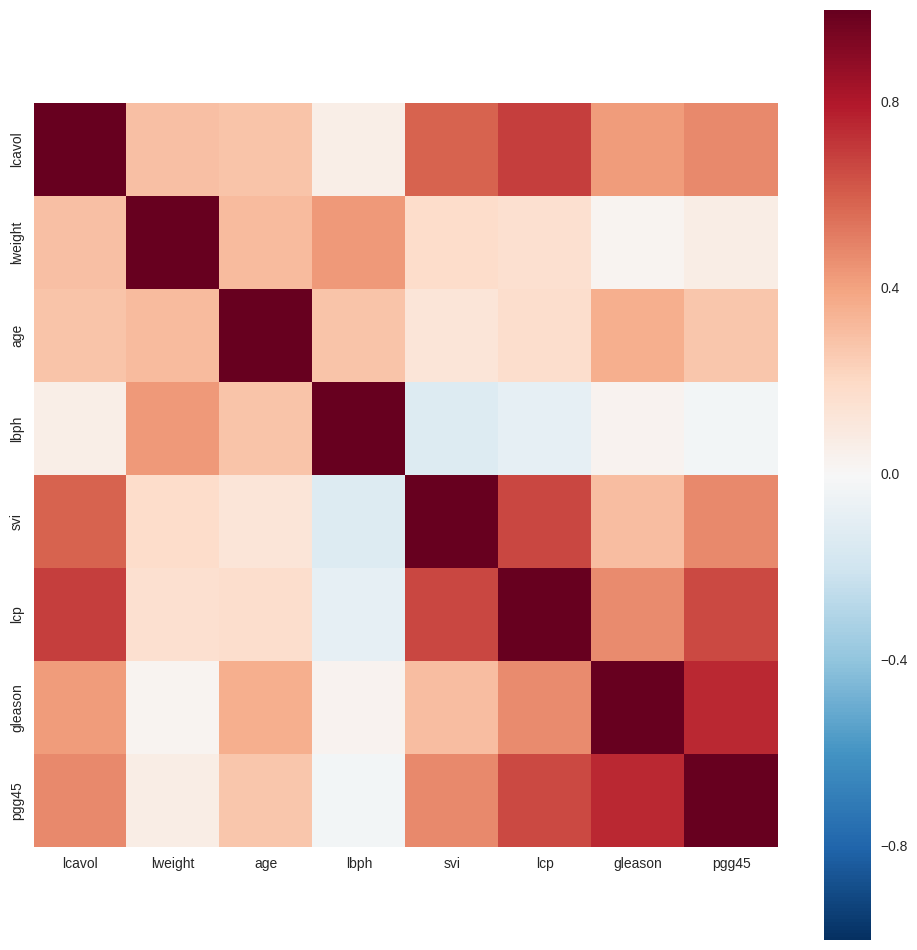

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, square=True)

# Numpy Approach

In [7]:
# casting these to matrices allows us to use "*" as matrix multiplication 
# as opposed to point-wise multiplication for numpy arrays. 
X = np.matrix(df_X.values)
y = np.matrix(df_y.values)

# add a column of ones so we don't have to treat the intercept differently
X = np.c_[np.ones(X.shape[0]), X]

# use the normal equation (Eq. 3.6) to calculate the coefficients and predictions
beta_hat = np.linalg.pinv(X.T * X) * X.T * y
y_hat = X * beta_hat

# estimate the variance of y
sig2_hat = float((y-y_hat).T*(y-y_hat)/(N-p-1))
sig_hat = np.sqrt(sig2_hat)

# calculate the covariance matrix of beta
cvmat_beta_hat = np.linalg.inv(X.T * X) * sig2_hat

# note <matrix>.A returns a numpy array of self
#      <matrix>.A1 returns a flattened numpy array of self
std_err = np.sqrt(cvmat_beta_hat.diagonal().A1)
z_hat = beta_hat.A1 / std_err

print('sig2_hat=',sig2_hat)
print('shape(cvmat_beta_hat)=', cvmat_beta_hat.shape)

df_coefs = pandas.DataFrame({
        'coefficient': beta_hat.A1, 
        'std_err': std_err, 
        'z_hat': z_hat}, 
        index=['intercept']+predictors)
print()
print(df_coefs)



sig2_hat= 0.5073514562053173
shape(cvmat_beta_hat)= (9, 9)

           coefficient   std_err      z_hat
intercept     2.452345  0.087020  28.181527
lcavol        0.716407  0.133501   5.366290
lweight       0.292642  0.106385   2.750789
age          -0.142550  0.102120  -1.395909
lbph          0.212008  0.103124   2.055846
svi           0.309620  0.125390   2.469255
lcp          -0.289006  0.154804  -1.866913
gleason      -0.020914  0.142578  -0.146681
pgg45         0.277346  0.159592   1.737840


In [8]:
# compare the parameters to those calculated from scikit-learn
# note "fit_intercept=False" means we dont need the value that 
# would usually be in mdl.intercept_ b/c we will have it as the 
# first element of mdl.coef_
mdl = linear_model.LinearRegression(fit_intercept=False)
mdl.fit(X, y)

for i in range(mdl.coef_.shape[1]):
    beta_hat_i = beta_hat[i,0] # (p+1 X 1) matrix
    skt_i = mdl.coef_[0,i] # (1 X p+1) matrix
    print(i, beta_hat_i, skt_i, beta_hat_i - skt_i)

0 2.45234508507 2.45234508507 -1.7763568394e-15
1 0.71640701248 0.71640701248 8.881784197e-16
2 0.29264240076 0.29264240076 5.55111512313e-16
3 -0.142549625985 -0.142549625985 -1.38777878078e-16
4 0.212007604489 0.212007604489 4.71844785466e-16
5 0.309619533067 0.309619533067 0.0
6 -0.289005615691 -0.289005615691 -4.99600361081e-16
7 -0.0209135198219 -0.0209135198219 5.6898930012e-16
8 0.277345952502 0.277345952502 -1.66533453694e-16


# Statsmodels Approach

In [9]:
df_Xsm = df_X.copy()
df_Xsm.insert(0, 'intercept', 1)
results=sm.OLS(df_y, df_Xsm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sat, 27 May 2017   Prob (F-statistic):           2.04e-12
Time:                        17:49:22   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept      2.4523      0.087     28.182      0.0